In [1]:
%matplotlib inline

This notebook reproduces 

> **Fig 2**: Pure Zeeman effect in the first excited states of positronium.

from the article

> #### Combined Zeeman and Motional Stark Effects in the First Excited State of Positroninm
>
> Stephen M. Curry
>
> *Phys. Rev. A*, **7** (2), 447 (1973) [DOI:10.1103/PhysRevA.7.447](https://doi.org/10.1103/PhysRevA.7.447)

In [6]:
# packages
import os
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from psfs import Hamiltonian, En_h, h
# https://github.com/ad3ller/Stark-map-tools
from smtools import sm_sort, lc_cmap

In [10]:
# construct matrix
mat = Hamiltonian(n_min=1, n_max=3, MJ_max=None)
print('number of basis states:', '%d'%mat.num_states)

number of basis states: 56


In [8]:
# calculate Zeeman map
Bfield = np.linspace(0, 0.7, 1000)  # T
singlet_states = mat.where('S', 0)
zm0, amp0 = mat.zeeman_map(Bfield, eig_amp=singlet_states, tqdm_disable=True)
zm0, amp0 = sm_sort(zm0, amp0)
# ensure 0 < amp0 < 1
amp0 = np.clip(amp0, 0, 1)

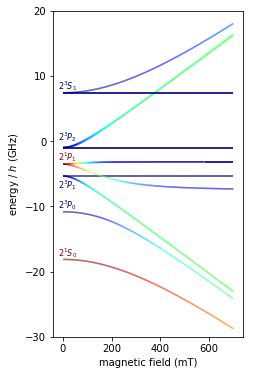

In [15]:
cmap = cm.jet
# plot Zeeman map
fig, ax = plt.subplots(figsize=(3.4, 6))

yoffset = En_h / 16.0

# plot
ixs = mat.where('n', 2)
for ix in ixs:
    cs = cmap(amp0[:, ix], alpha=0.8)
    lc = lc_cmap(1e3*Bfield, 1e-9*(zm0[:, ix] + yoffset) / h, cs)
    lc.set_linewidth(1.5)
    ax.add_collection(lc)

# labels
indx = reduce(np.intersect1d, (mat.where('n', 2),
                               mat.where('MJ', 0)))
lbl_adjust = [0.6, 0.6, -1.8, 0.6, 1.2, 0.6]
for i, ix in enumerate(indx):
    el = mat.basis[ix]
    c = cmap(1.0) if el.S == 0 else cmap(0.0)
    lbl = el.tex(show_MJ=False)
    en = 1e-9*(el.E0 *En_h + yoffset)/h
    ax.annotate(lbl, [-20, en + lbl_adjust[i]], size=8, color=c)

# format
ax.set_xlim(-40, np.max(Bfield)*1e3 + 40)
ax.set_ylim(-30, 20)
ax.set_ylabel('energy / $h$ (GHz)')
ax.set_xlabel('magnetic field (mT)')

# output
fileout = os.path.join("../images/zeeman_n2.png")
plt.savefig(fileout, dpi=150, bbox_inches='tight')
plt.show()